# Deejay Five 2018

data from https://www.endu.net/en/events/deejay-ten-milano-2/results

In [1]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
import seaborn as sns
from scipy.stats import rankdata
%matplotlib inline

In [2]:
data = pd.read_csv('205557_4OEE8SSV6C.txt', sep='  +', skiprows=1, engine='python', header=None)
data.columns = ['pett', 'atleta', 'sex', 'naz', 'race time', 'real time', 'media']
data = data.set_index('pett')
data['race time [min]'] = (pd.to_timedelta(data['race time']) / pd.Timedelta(minutes=1))
data['real time [min]'] = (pd.to_timedelta(data['real time']) / pd.Timedelta(minutes=1))
#data['media'] = pd.to_timedelta(data['media'])

More women then men

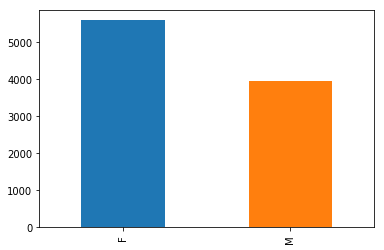

In [3]:
data.sex.value_counts().plot.bar()

A lot of Spanish

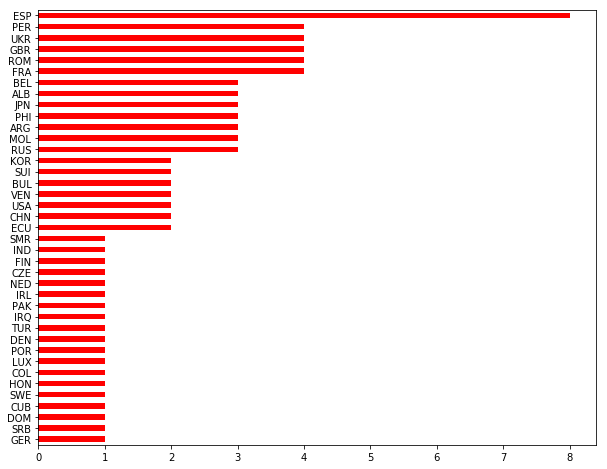

In [4]:
fig, ax = plt.subplots(figsize=(10, 8))
data.naz[data.naz != 'ITA'].value_counts()[::-1].plot.barh(ax=ax, color='r')

Pett is usually > 30000

/usr/lib/python3.7/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


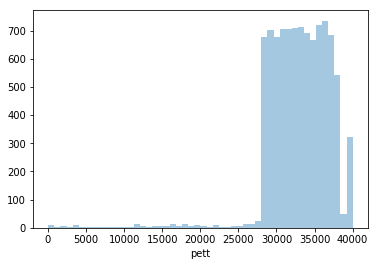

In [5]:
sns.distplot(data.index, kde=False)

Some outliers, remove them

/usr/lib/python3.7/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


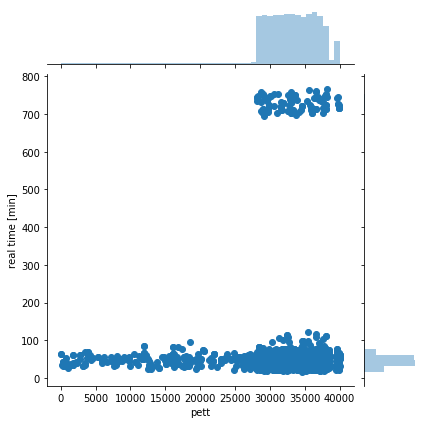

In [6]:
sns.jointplot(data.index, data['real time [min]'])

In [7]:
data = data[data['real time [min]'] < 600]

In [8]:
data['rank'] = rankdata(data['real time [min]'])
data['rank normalized'] = data['rank'] / float(len(data))

data_F = data[data.sex == 'F']
rank_F = pd.Series(rankdata(data_F['real time [min]']), index=data_F.index)
data['rank_F'] = rank_F
data['rank_F normalized'] = data['rank_F'] / float(len(data_F))

data_M = data[data.sex == 'M']
rank_M = pd.Series(rankdata(data_M['real time [min]']), index=data_M.index)
data['rank_M'] = rank_M
data['rank_M normalized'] = data['rank_M'] / float(len(data_M))

In [9]:
data.groupby('sex').agg({'real time [min]':(np.mean, np.median, np.std)})

real time [min]                      
               mean     median        std
sex                                      
F         47.485648  47.833333  11.467481
M         43.753258  42.533333  13.306743

In [10]:
data.groupby('naz').agg({'real time [min]':np.mean, 'sex':len}).sort_values(by='real time [min]').rename({'sex': '#'}, axis=1)

,real time [min],#
naz,,
COL,23.366667,1
SUI,26.083333,2
CZE,28.966667,1
BUL,29.150000,2
ECU,29.758333,2
RUS,30.066667,3
GER,30.516667,1
FRA,33.008333,4
KOR,33.516667,2


## Our rank

In [11]:
data[data['atleta'] == 'TURRA RUGGERO']

,atleta,sex,naz,race time,real time,media,race time [min],real time [min],rank,rank normalized,rank_F,rank_F normalized,rank_M,rank_M normalized
pett,,,,,,,,,,,,,,
34166,TURRA RUGGERO,M,ITA,0:29:37,0:29:37,5:55,29.616667,29.616667,815.0,0.086362,NaN,NaN,591.5,0.151124


In [12]:
data[data['atleta'] == 'POZZI ALESSANDRA']

,atleta,sex,naz,race time,real time,media,race time [min],real time [min],rank,rank normalized,rank_F,rank_F normalized,rank_M,rank_M normalized
pett,,,,,,,,,,,,,,
34165,POZZI ALESSANDRA,F,ITA,0:29:36,0:29:36,5:55,29.6,29.6,811.0,0.085938,221.5,0.040105,NaN,NaN


## Time distribution

/usr/lib/python3.7/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


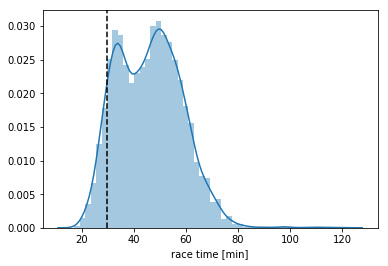

In [14]:
fig, ax = plt.subplots()
d = data['race time [min]']
sns.distplot(d, bins=50, ax=ax)

ax.axvline(data[data['atleta'] == 'TURRA RUGGERO']['race time [min]'].values, c='k', ls='--')

plt.show()

## Time distribution by sex

/usr/lib/python3.7/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


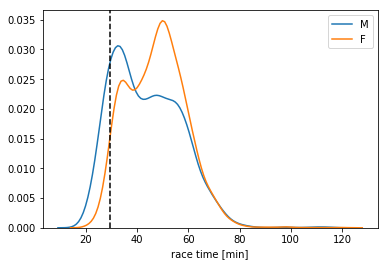

In [15]:
fig, ax = plt.subplots()
dM = data[data['sex']=='M']['race time [min]']
dF = data[data['sex']=='F']['race time [min]']
sns.distplot(dM, bins=50, ax=ax, hist=False, label='M')
sns.distplot(dF, bins=50, ax=ax, hist=False, label='F')
ax.axvline(data[data['atleta'] == 'TURRA RUGGERO']['race time [min]'].values, c='k', ls='--')
plt.show()

## Correlation pett / time

/usr/lib/python3.7/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


[]

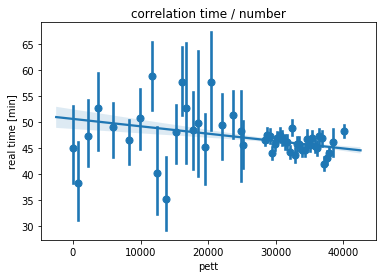

In [19]:
bins_low = np.percentile(data.index[d.index < 25000].values, np.linspace(0, 100, 20))
bins_hi = np.percentile(data.index[d.index >= 25000].values, np.linspace(0, 100, 30))
bins = np.concatenate([bins_low, bins_hi])

fig, ax = plt.subplots()
sns.regplot(x=data.index.values, y=data['real time [min]'], x_bins=bins, ax=ax)
ax.set_title('correlation time / number')
ax.set_xlabel('pett')
plt.plot()

Early bird are slower?